In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dddm
from mcmc import utils
from tqdm import tqdm

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
# plt.style.available

In [2]:
plt.style.use('seaborn-v0_8-deep') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

# tes potential

In [3]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
sigmaDD = [7.]
hDD = [30.]
log_nu0 = [-3]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw = [2]
log_a = [.5]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + log_nu0 + R + zsun + w0 + log_sigmaw + log_a]).flatten()
theta.shape

(33,)

In [5]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)
print(z)
phi = dddm.potential(z, theta)

[-1000.  -999.  -998. ...   997.   998.   999.]


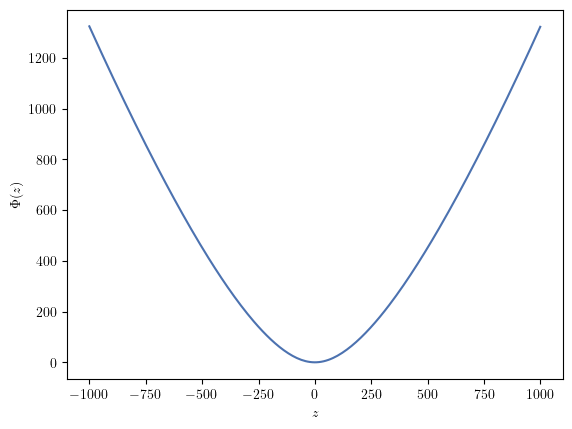

In [6]:
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

# tes fz

In [7]:
fz = dddm.fz(z, theta)
fz

array([1.45929967e-12, 1.51273713e-12, 1.56813140e-12, ...,
       1.62555412e-12, 1.56813140e-12, 1.51273713e-12])

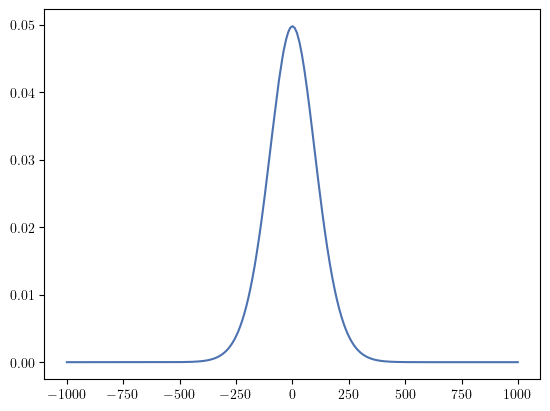

In [8]:
plt.plot(z, fz)

# tes fw

In [11]:
w = np.linspace(-50, 30, 1000)

fw = dddm.fw(w, theta)
fw.shape

(1000,)

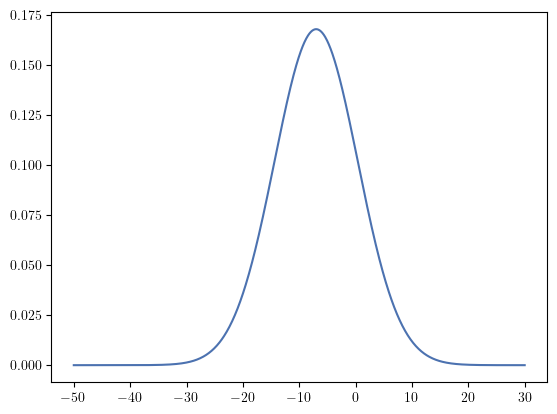

In [12]:
plt.plot(w, fw)

# tes log_prob

In [21]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
sigmaDD = [7.]
hDD = [30.]
log_nu0 = [-2]
R = [3.4E-3]
zsun = [0]
w0 = [-7]
log_sigmaw = [2]
log_a = [.5]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + log_nu0 + R + zsun + w0 + log_sigmaw + log_a]).flatten()
theta.shape

(33,)

In [14]:
zdata = np.loadtxt('data/z1.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]

wdata = np.loadtxt('data/w1.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [22]:
locs = dict(
    rhoDM=-0.02,
    sigmaDD=1.,
    hDD=1,
    log_nu0=-3,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    log_sigmaw=0,
    log_a=-2
)

scales = dict(
    rhoDM=0.08,
    sigmaDD=30,
    hDD=100,
    log_nu0=3,
    R=0.6E-3,
    zsun=40,
    w0=5,
    log_sigmaw=6,
    log_a=3
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('sigmaDD', 1.0, 7.0, 31.0),
 ('hDD', 1.0, 30.0, 101.0),
 ('log_nu0', -3.0, -2.0, 0.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -20.0, 0.0, 20.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 2.0, 6.0),
 ('log_a', -2.0, 0.5, 1.0)]

In [23]:
dddm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

(array([53.22395139]), array([-1254.6668567]))

# mcmc

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
import os
import sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
from mcmc import dddm
from mcmc import utils
from tqdm import tqdm
plt.style.use('seaborn-v0_8-deep')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [9]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]
rhoDM = [0.016]
sigmaDD = [7.]
log_hDD = [np.log(30.)]
log_nu0 = [-2]
R = [3.4E-3]
zsun = [20]
w0 = [-7]
log_sigmaw = [2]
log_a = [.5]

theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + log_hDD + log_nu0 + R + zsun + w0 + log_sigmaw + log_a]).flatten()
theta.shape

(33,)

In [3]:
ndim = 33
nwalkers = 2*ndim+2

In [26]:
locs = dict(
    rhoDM=-0.02,
    sigmaDD=1.,
    log_hDD=np.log(1),
    log_nu0=-2.3,
    R=3.4E-3,
    zsun=-50,
    w0=-10,
    log_sigmaw=0,
    log_a=-2
)

scales = dict(
    rhoDM=0.08,
    sigmaDD=30,
    log_hDD=np.log(1000),
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=5,
    log_sigmaw=3,
    log_a=3
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.02, 0.016, 0.06),
 ('sigmaDD', 1.0, 7.0, 31.0),
 ('log_hDD', 0.0, 3.4011973816621555, 6.907755278982137),
 ('log_nu0', -2.3, -2.0, 0.7000000000000002),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 20.0, 50.0),
 ('w0', -10.0, -7.0, -5.0),
 ('log_sigmaw', 0.0, 2.0, 3.0),
 ('log_a', -2.0, 0.5, 1.0)]

In [27]:
p0 = dddm.generate_p0(nwalkers, locs, scales, kind=1)
p0.shape

(68, 33)

In [28]:
zdata = np.loadtxt('data/z1.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('data/w1.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [29]:
dddm.log_prob(p0, zdata, wdata, locs, scales)

(array([43.64163208, 47.37465504, 41.8088206 , 42.71760582, 38.81327207,
        39.9484344 , 43.73741189, 43.77596672, 43.32001788, 45.72724217,
        48.39454794, 47.78626091, 41.16719737, 36.14328362, 48.32466942,
        42.5261865 , 43.43470236, 44.9370503 , 38.89710953, 41.24372998,
        39.84075207, 47.86202473, 40.90885417, 44.16492124, 37.53984153,
        35.36337754, 42.18072073, 46.57989941, 44.92600791, 41.46653798,
        45.44284795, 37.0473203 , 44.58770423, 45.27757271, 46.46791662,
        46.6821841 , 44.57967159, 38.83659156, 45.91624683, 43.96928702,
        46.54034528, 38.17892688, 46.24644662, 49.24323114, 42.70306457,
        42.60661945, 38.04208588, 47.32912839, 39.06361788, 38.86829955,
        42.45365744, 35.47486409, 48.57180062, 40.13683312, 45.4435299 ,
        41.09683061, 42.88539449, 40.59428953, 41.63731144, 38.61007104,
        42.24623288, 46.07632136, 39.57909996, 44.64057044, 47.8191531 ,
        39.88578552, 41.54042902, 44.75441403]),
 a

(33,)


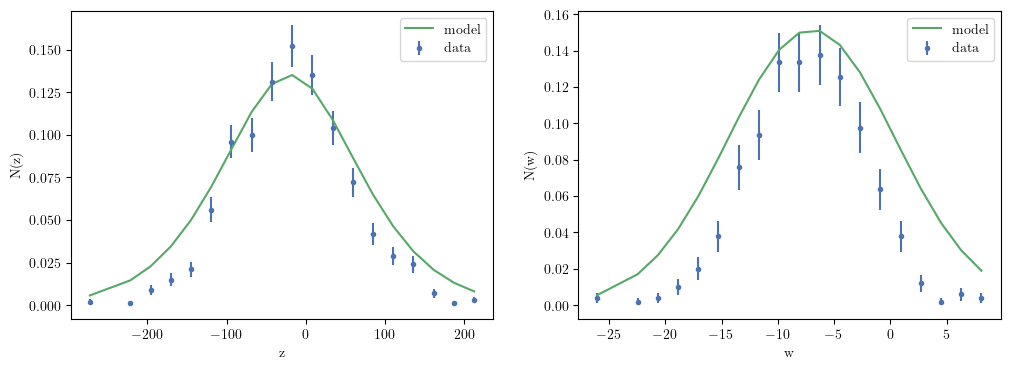

(array([54.98018611]), array([-515.02702591]))

In [23]:
print(theta.shape)
zmod = dddm.fz(zmid, theta)
wmod = dddm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dddm.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [30]:
t0 = time()
sampler = dddm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

Acceptance rate: 0.24158823529411766
28.17202377319336 s


In [ ]:
# t0 = time()
# sampler = dm.run_mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True, batch=5)
# print(time() - t0, "s")
# chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

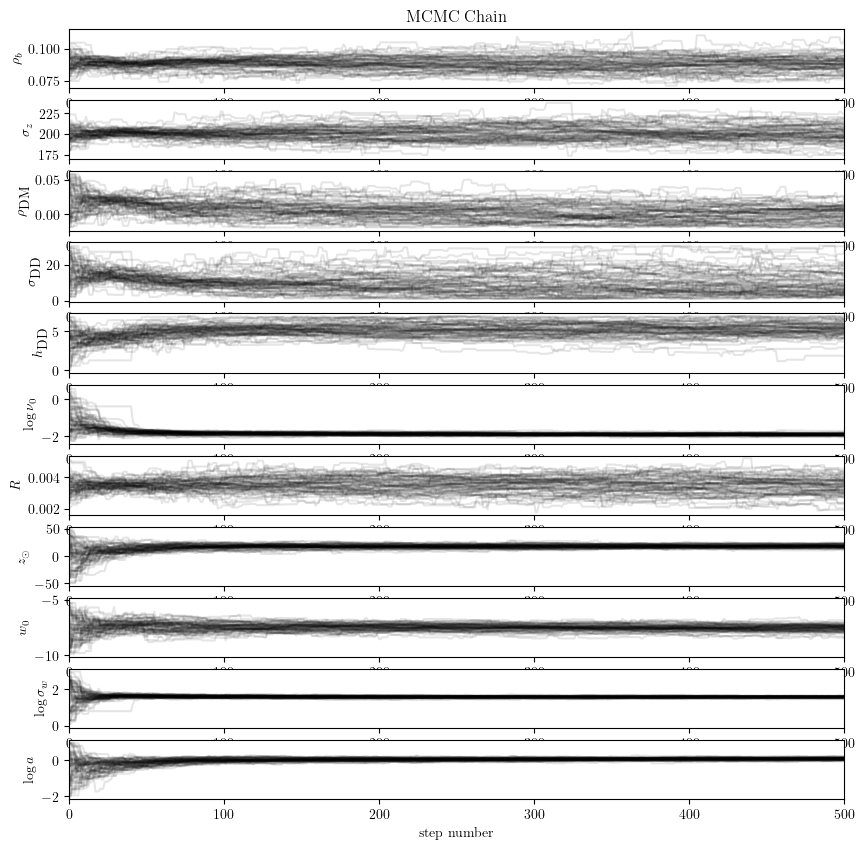

In [31]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
sigmaDD = chain[:, :, 25].T
log_hDD = chain[:, :, 26].T
nu0 = chain[:, :, 27].T
R = chain[:, :, 28].T
zsun = chain[:, :, 29].T
w0 = chain[:, :, 30].T
log_sigmaw = chain[:, :, 31].T
log_a = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, sigmaDD, log_hDD, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

In [32]:
p0_next = chain[-1, :, :]
t0 = time()
sampler = dddm.run_mcmc(500, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True)
print(time() - t0, "s")
chain, probs = sampler[:,:,:-3], sampler[:,:,-3:]

Acceptance rate: 0.2031764705882353
27.9995219707489 s


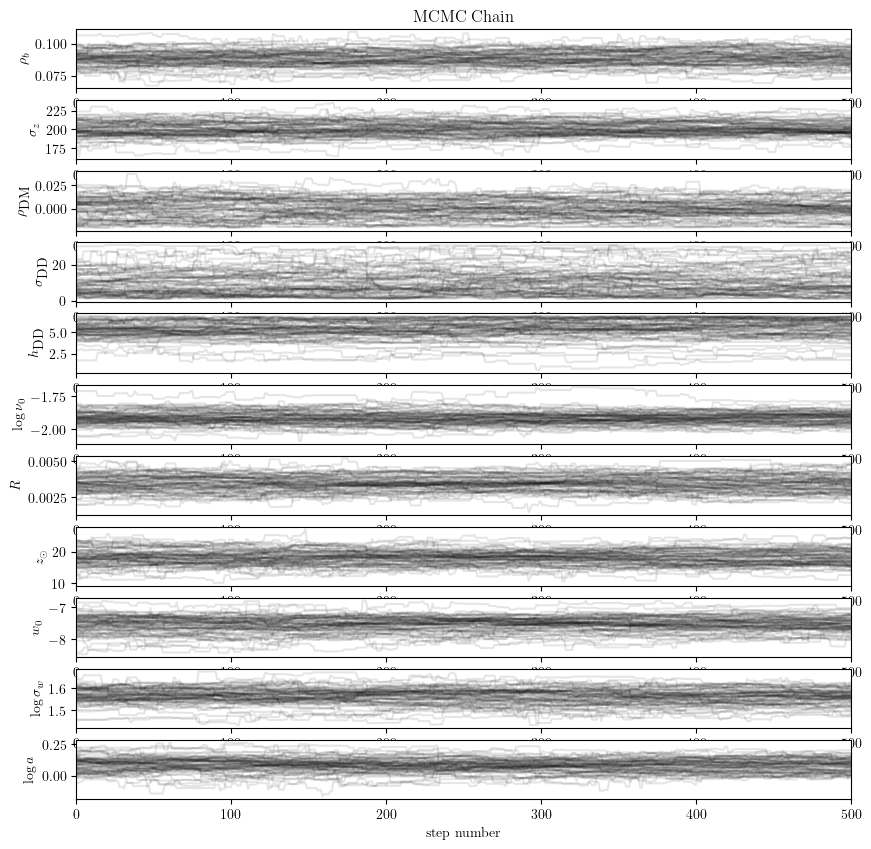

In [33]:
rhob = chain[:, :, :12].sum(axis=2).T
sigmaz = chain[:, :, 12:24].sum(axis=2).T
rhoDM = chain[:, :, 24].T
sigmaDD = chain[:, :, 25].T
log_hDD = chain[:, :, 26].T
nu0 = chain[:, :, 27].T
R = chain[:, :, 28].T
zsun = chain[:, :, 29].T
w0 = chain[:, :, 30].T
log_sigmaw = chain[:, :, 31].T
log_a = chain[:, :, 32].T

params = np.array([rhob, sigmaz, rhoDM, sigmaDD, log_hDD, nu0, R, zsun, w0, log_sigmaw, log_a]).T

labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_chain(params, labels)

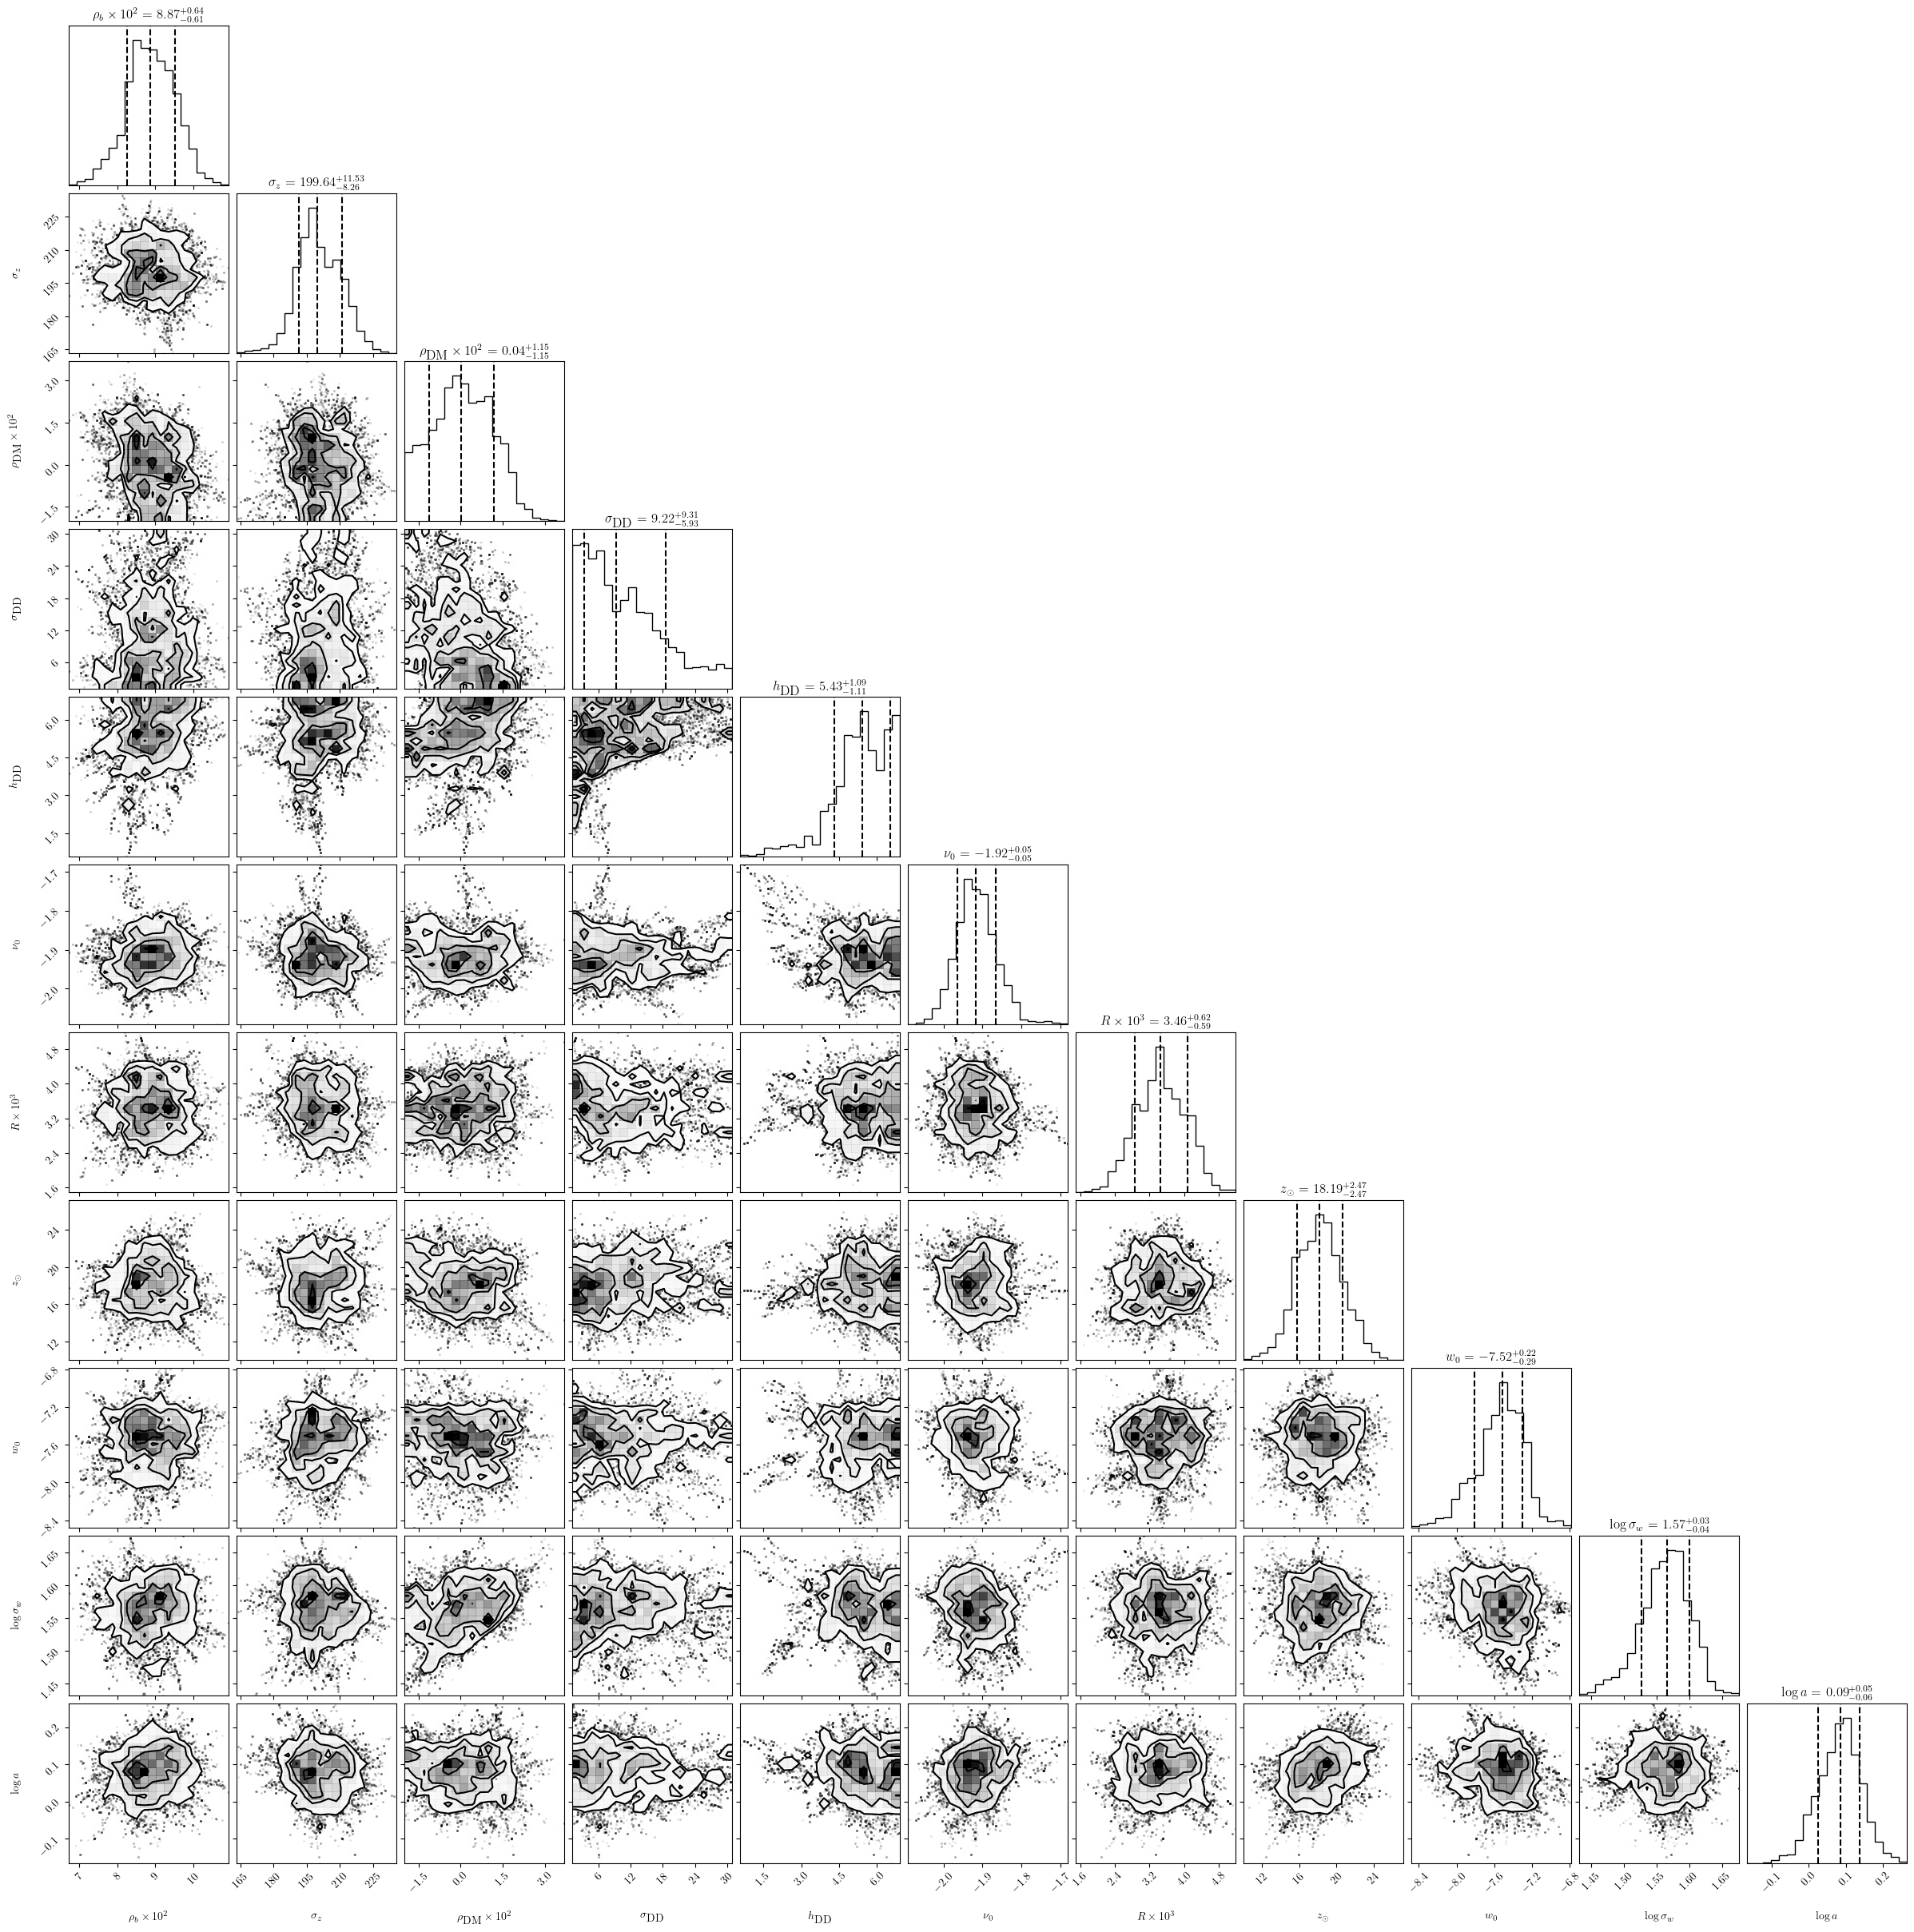

In [34]:
rhob_f = rhob/1E-2
sigmaz_f = sigmaz
rhoDM_f = rhoDM/1E-2
sigmaDD_f = sigmaDD
log_hDD_f = log_hDD
nu0_f = nu0
R_f = R/1E-3
zsun_f = zsun
w0_f = w0
log_sigmaw_f = log_sigmaw
log_a_f = log_a

flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, sigmaDD_f, log_hDD_f, nu0_f, R_f, zsun_f, w0_f, log_sigmaw_f, log_a_f]).T

labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\sigma_{\textup{DD}}$', r'$h_{\textup{DD}}$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_w$', r'$\log a$']
utils.plot_corner(flat_samples, labels)

# fit

In [36]:
def plot_fit(func, zdata, wdata, chain, ndim, n=50000, alpha=0.2, path=None, dpi=100):
    zmid, znum, zerr = zdata
    wmid, wnum, werr = wdata
    
    flat_samples = chain.reshape((-1, ndim))
    zs = np.linspace(zmid.min()*1.1, zmid.max()*1.1, 100)
    ws = np.linspace(wmid.min()*1.1, wmid.max()*1.1, 100)
    fzs = np.empty((n, len(zs)))
    fws = np.empty((n, len(ws)))
    for i in tqdm(range(n)):
        ind = np.random.randint(len(flat_samples))
        theta = flat_samples[ind]
        fzs[i] = func.fz(zs, theta ,1.)
        fws[i] = func.fw(ws, theta ,1.)
    fz_log_mean = np.log(fzs).mean(axis=0)
    fz_log_std = np.log(fzs).std(axis=0)
    fz_mean = np.exp(fz_log_mean)

    fw_log_mean = np.log(fws).mean(axis=0)
    fw_log_std = np.log(fws).std(axis=0)
    fw_mean = np.exp(fw_log_mean)

    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    axes[0].errorbar(zmid, znum, yerr=zerr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 1.9600*fz_log_std), np.exp(fz_log_mean + 1.9600*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - 1.6449*fz_log_std), np.exp(fz_log_mean + 1.6449*fz_log_std), alpha=alpha, color="C0")
    axes[0].fill_between(zs, np.exp(fz_log_mean - fz_log_std), np.exp(fz_log_mean + fz_log_std), alpha=alpha, color="C0")
    axes[0].plot(zs, fz_mean, c="C0", ls="--")
    axes[0].set_ylabel(r'$\nu(z)$')
    axes[0].set_xlabel(r'$z$ [pc]')
    axes[0].set_ylim(np.min(np.exp(fz_log_mean - 1.9600*fz_log_std)), np.max(np.exp(fz_log_mean)*1.5))
    axes[0].set_xlim(zs.min(), zs.max())
    axes[0].set_yscale('log')
    axes[1].errorbar(wmid, wnum, yerr=werr, color='k', alpha=0.5, capsize=2, fmt=".")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 1.9600*fw_log_std), np.exp(fw_log_mean + 1.9600*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - 1.6449*fw_log_std), np.exp(fw_log_mean + 1.6449*fw_log_std), alpha=alpha, color="C0")
    axes[1].fill_between(ws, np.exp(fw_log_mean - fw_log_std), np.exp(fw_log_mean + fw_log_std), alpha=alpha, color="C0")
    axes[1].plot(ws, fw_mean, c="C0", ls="--")
    axes[1].set_ylabel(r'$f_0(w)$')
    axes[1].set_xlabel(r'$w$ [km/s]')
    axes[1].set_ylim(np.min(np.exp(fw_log_mean - 1.9600*fw_log_std)), np.max(np.exp(fw_log_mean)*1.5))
    axes[1].set_xlim(ws.min(), ws.max())
    axes[1].set_yscale('log')
    if path is not None:
        fig.savefig(path, dpi=dpi)

100%|██████████| 50000/50000 [00:24<00:00, 2064.55it/s]


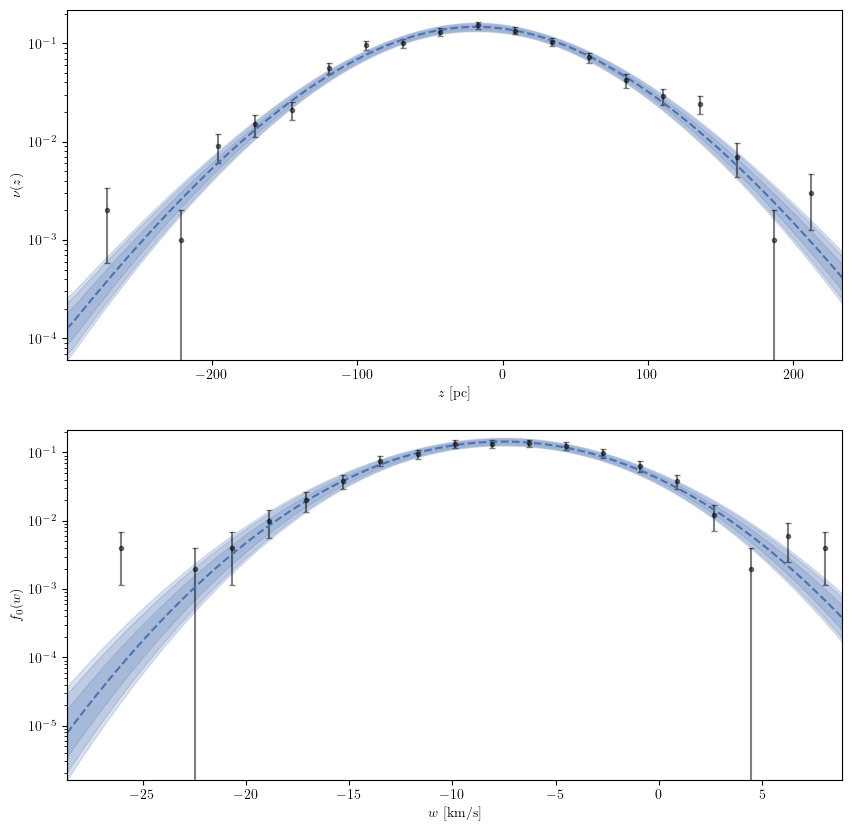

In [37]:
plot_fit(dddm, zdata, wdata, chain, ndim)